## Lab 3.4: csvs, functions, numpy, and distributions

Run the cell below to load the required packages and set up plotting in the notebook!

In [73]:
pwd

u'/Users/VanessaG/Desktop/DSI-SF-2-vnessified/7_28/3.4-lab-distributions-numpy/code/starter-code'

In [25]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pprint
%matplotlib inline

### Sales data

For this lab we will be using a truncated version of some sales data that we will be looking at further down the line in more detail. 

The csv has about 200 rows of data and 4 columns. The relative path to the csv ```sales_info.csv``` is provided below. If you copied files over and moved them around, this might be different for you and you will have to figure out the correct relative path to enter.

In [14]:
sales_csv_path = '/Users/VanessaG/Desktop/DSI-SF-2-vnessified/datasets/sales_data_simple/sales.csv'


#### 1. Loading the data

Set up an empty list called ```rows```.

Using the pattern for loading csvs we learned earlier, add all of the rows in the csv file to the rows list.

For your reference, the pattern is:
```python
with open(my_csv_path, 'r') as f:
    reader = csv.reader(f)
    ...
```

Beyond this, adding the rows in the csv file to the ```rows``` variable is up to you.

In [15]:
rows = []

with open(sales_csv_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)


##### 2. Separate header and data

The header of the csv is contained in the first index of the ```rows``` variable, as it is the first row in the csv file. 

Use python indexing to create two new variables: ```header``` which contains the 4 column names, and ```data``` which contains the list of lists, each sub-list representing a row from the csv.

Lastly, print ```header``` to see the names of the columns.

In [16]:
header = rows[0]
header

['volume_sold', '2015_margin', '2015_q1_sales', '2016_q1_sales']

In [17]:
data = rows[1:]

#### 3. Create a dictionary with the data

Use loops or list comprehensions to create a dictionary called ```sales_data```, where the keys of the dictionary are the column names, and the values of the dictionary are lists of the data points of the column corresponding to that column name.

In [20]:
sales_data = {key:[] for key in header}
sales_data

{'2015_margin': [],
 '2015_q1_sales': [],
 '2016_q1_sales': [],
 'volume_sold': []}

In [23]:
for i, col in enumerate(header):
    for row in data:
        sales_data[col].append(row[i])
        

In [31]:
{key:values[0:2] for key,values in sales_data.items()}



{'2015_margin': ['93.8022814583', '21.0824246877'],
 '2015_q1_sales': ['337166.53', '22351.86'],
 '2016_q1_sales': ['337804.05', '21736.63'],
 'volume_sold': ['18.4207604861', '4.77650991918']}

**3.A** Print out the first 10 items of the 'volume_sold' column.

In [29]:
sales_data['volume_sold'][:10]

['18.4207604861',
 '4.77650991918',
 '16.6024006077',
 '4.29611149826',
 '8.15602328201',
 '5.00512242518',
 '14.60675',
 '4.45646649485',
 '5.04752965097',
 '5.38807023767']

#### 4. Convert data from string to float

As you can see, the data is still in string format (which is how it is read in from the csv). For each key:value pair in our ```sales_data``` dictionary, convert the values (column data) from string values to float values.

In [36]:
for column in header:
    string_row = sales_data[column]
    float_row = [float(s) for s in string_row]
    sales_data[column] = float_row

In [37]:
{key:values[0:2] for key,values in sales_data.items()}

{'2015_margin': [93.8022814583, 21.0824246877],
 '2015_q1_sales': [337166.53, 22351.86],
 '2016_q1_sales': [337804.05, 21736.63],
 'volume_sold': [18.4207604861, 4.77650991918]}

#### 5. Write function to print summary statistics

Now write a function to print out summary statistics for the data.

Your function should:

- Accept two arguments: the column name and the data associated with that column
- Print out information, clearly labeling each item when you print it:
    1. Print out the column name
    2. Print the mean of the data using ```np.mean()```
    3. Print out the median of the data using ```np.median()```
    4. Print out the mode of the **rounded data** using ```stats.mode()```
    5. Print out the variance of the data using ```np.var()```
    6. Print out the standard deviation of the data using ```np.std()```
    
Remember that you will need to convert the numeric data from these function to strings by wrapping them in the ```str()``` function.

In [52]:
header[0]

'volume_sold'

In [53]:
print 'column: ' + header[0]

column: volume_sold


In [70]:
def sum_stats(header,data):
    print 'column: ' + header
    print 'mean: ' + str(np.mean(data))
    print 'median: ' + str(np.median(data))
    print 'mode: ' + str(stats.mode(data))
    print 'variance: ' + str(np.var(data))
    print 'standard deviation: ' + str(np.std(data))    

**5.A** Using your function, print the summary statistics for 'volume_sold'

In [71]:
#sum_stats(header,data)

sum_stats('volume_sold', sales_data['volume_sold'])

column: volume_sold
mean: 10.018684079
median: 8.16634551564
mode: ModeResult(mode=array([ 2.7946315]), count=array([1]))
variance: 84.1299652005
standard deviation: 9.1722388325


**5.B** Using your function, print the summary statistics for '2015_margin'

In [72]:
sum_stats('2015_margin', sales_data['2015_margin'])

column: 2015_margin
mean: 46.8588951379
median: 36.5621438181
mode: ModeResult(mode=array([ 11.9961177]), count=array([1]))
variance: 2016.06166296
standard deviation: 44.9005753077


**5.C** Using your function, print the summary statistics for '2015_q1_sales'

In [75]:
sum_stats('2015_q1_sales', sales_data['2015_q1_sales'])

column: 2015_q1_sales
mean: 154631.6682
median: 104199.41
mode: ModeResult(mode=array([ 4151.93]), count=array([1]))
variance: 47430301462.3
standard deviation: 217784.989066


**5.D** Using your function, print the summary statistics for '2016_q1_sales'

In [77]:
sum_stats('2016_q1_sales', sales_data['2016_q1_sales'])

column: 2016_q1_sales
mean: 154699.17875
median: 103207.2
mode: ModeResult(mode=array([ 3536.14]), count=array([1]))
variance: 47139411653.4
standard deviation: 217116.124812


#### 6. Plot the distributions

We've provided a plotting function below called ```distribution_plotter()```. It takes two arguments, the name of the column and the data associated with that column.

In individual cells, plot the distributions for each of the 4 columns. Do the data appear skewed? Symmetrical? If skewed, what would be your hypothesis for why?

In [104]:
def distribution_plotter(header, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

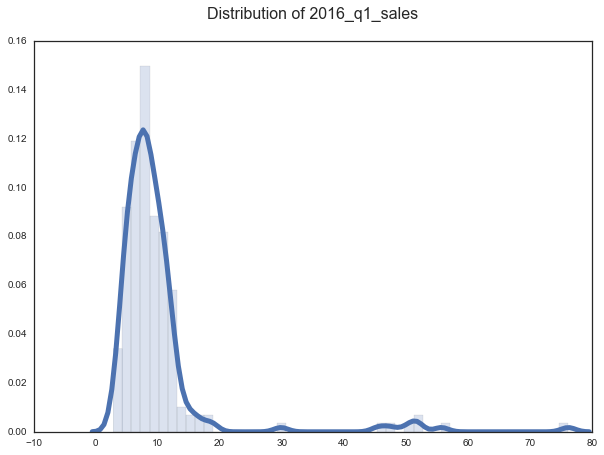

In [105]:
distribution_plotter('volume_sold', sales_data['volume_sold'])

## Prologue to Plotting / Visual Elements

Check out this example:

```python
   1.  sns.set(rc={"figure.figsize": (10, 7)})
   2.  sns.set_style("white")
   3.  dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
   4.  dist.set_title("I'm a fairly cool plot!", fontsize=16)
```

**1.** With Seaborn (the `sns` object in context), the `sns.set()` method with `{"figure.figsize": (10, 7)}` parameter will control the size of the plot based on aspect ratio and scale.<br><br>
**2.** Seaborn comes with a variety of styles.  They can be set using `sns.set_style([The style])`.  There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and ticks. They are each suited to different applications and personal preferences. The default theme is `darkgrid`. <br><br>
**3.** There are plenty of different types of plot types available.  For getting sense of the distribution of your data, `sns.distplot()` is a great choice.  The first paramter `data` is the only required parameter.  The other parameters in our example on line 3, control the visual aesthetics.  You can read more about [controling the visual aesthetics](https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html) of Seaborn.
<br><br>
**4.** Notice on line 3, we've assigned a reference to sns.distplot(), to a variable called `dist`.  In order to control certain visual elements, it's necessary to have a reference to the specific instance that initially references the plotting function. In this case, with the plot refernece to "distplot", it's possible to set the title using `.set_title`.

In [ ]:
# We are going to convert our sales data to a Pandas DataFrame for convenience.
# We will go into much more depth about Pandas in the near future

# For the rest of the lab, use this `sales_data` object, as if it where a dictionary.
# ** A DataFrame is much different than a python dictionary!!! Don't worry about yet! **
import pandas as pd

sales_data = pd.DataFrame(sales_data)

### 7. Different Plot Methods

Plot some of your variables from our prior dataset (ie: sales_data[KEY_NAME_HERE]) using these plotting methods:

- **kdeplot** /w params `shading=True`
- **jointplot** /w params `x="volume_sold", y="2015_margin"`
- **tsplot** /w params `data=sales_data['2015_q1_sales']`
- **pairplot** (pass the entire sales_data as the `data` parameter)

### 8. Multiple Plots

There are times when we would like to plot different distributions in context with each other on the same plot.  By default, using the Seaborn library, when we attempt to call multiple plots, using different datasets, the display with consolitdate to a single figure output.

Call multiple `kdeplot` in a single frame, using the keys: ['volume_sold', '2015_margin']

** Bonus:  Do it with a loop **

_Protip:  It's helpful to change the alpha parameter to less than 1.0 to control the visual transperancy of the layered plots that are displayed, so each of the distributions can be much more differentiated._



### 9. Bonus Challenge:  Explore The Seaborn Gallery

Explore the [Seaborn Gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html), and attempt to adapt 2-3 other plot methods using our `sales_data`.  This should give you a little context and familliarity with some of the most common plotting functions in Seaborn.  

Beyond this we will be diving into `matplotlib`, `pandas`, and other plotting packages.  The best way to get good at data visualization, is practicing.  Each package has their own nuance and convention, but most of these packages are rooted to matplotlib at a low level so it's possible to use these packages together.  Generally, seaborn and Pandas will get you most of the way there, but then using Matplotlib will help you "tweek" the finer aesthetics of the output.